In [1]:
from mpl_toolkits.basemap import Basemap
import pandas as pd
import requests
from bs4 import BeautifulSoup as BS
from IPython.core.display import HTML
from io import StringIO
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm
import string
import ipywidgets as widgets

%matplotlib inline

# https://en.wikipedia.org/wiki/List_of_deadly_earthquakes_since_1900

In [2]:
#request the website to use that data
response = requests.get('https://en.wikipedia.org/wiki/List_of_deadly_earthquakes_since_1900')

In [ ]:
type(response)

In [ ]:
#a 200 means it was successful 
response.status_code

In [ ]:
#this shows what you got from the response. this is the raw file.
response.text

In [3]:
#this cleans up the raw file and makes it a littlel easier to read
soup = BS(response.text, 'html.parser')

In [4]:
#this organizes the file with their respective tags
print(soup.prettify())

<!DOCTYPE html>
<html class="client-nojs" dir="ltr" lang="en">
 <head>
  <meta charset="utf-8"/>
  <title>
   List of deadly earthquakes since 1900 - Wikipedia
  </title>
  <script>
   document.documentElement.className="client-js";RLCONF={"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":!1,"wgNamespaceNumber":0,"wgPageName":"List_of_deadly_earthquakes_since_1900","wgTitle":"List of deadly earthquakes since 1900","wgCurRevisionId":917793754,"wgRevisionId":917793754,"wgArticleId":11673441,"wgIsArticle":!0,"wgIsRedirect":!1,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["CS1 errors: missing periodical","Articles needing additional references from July 2017","All articles needing additional references","Articles needing cleanup from July 2017","All pages needing cleanup","Cleanup tagged articles with a reason field from July 2017","Wikipedia pages needing cleanup from July 2017","Articles with obsolete information from July 2017","All Wikipedia articles in 

In [ ]:
#this finds gives me all the table tags that are in this website
soup.findAll('table')

In [ ]:
#this is selecting the specifit able that I want. used a dictonary 
#i want this table and the class sorteable wikitable
soup.find('table', attrs={'class' : 'sortable wikitable'})

In [5]:
#this is a way to print the table as it is on the website just to see that you selected the correct one
table_html = str(soup.find('table', attrs={'class' : 'sortable wikitable'}))

HTML(table_html)

In [6]:
#this gives us the table as list. now we have something to work with 
####ALSO all the missing values from the original table have been automatically replaced with NaN values 
tables = pd.read_html(table_html)

In [ ]:
#print table to see the list 
#print(tables)

In [7]:
type(tables)

list

In [8]:
#this turns the list into a dataframe. might need help understanding how this works!
earth_table = tables[0]

In [9]:
earth_table.columns

Index(['Origin (UTC)', 'Present-day country and link to Wikipedia article',
       'Lat', 'Long', 'Depth (km)', 'Magnitude', 'Secondary Effects',
       'PDE Shaking Deaths', 'PDE Total Deaths', 'Utsu Total Deaths',
       'EM-DAT Total Deaths', 'Other Source Deaths'],
      dtype='object')

### Clean the Country column

In [10]:
#add an underscore to the empty spaces
earth_table.columns=earth_table.columns.str.replace(' ','_')

In [11]:
#rename the country column
earth_table=earth_table.rename(columns={'Present-day_country_and_link_to_Wikipedia_article':'country'})

In [12]:
earth_table.columns

Index(['Origin_(UTC)', 'country', 'Lat', 'Long', 'Depth_(km)', 'Magnitude',
       'Secondary_Effects', 'PDE_Shaking_Deaths', 'PDE_Total_Deaths',
       'Utsu_Total_Deaths', 'EM-DAT_Total_Deaths', 'Other_Source_Deaths'],
      dtype='object')

In [ ]:
#####i no longer need this because i just made another function just for the country and split it at the space and parenthesis
#####see function below.
#doing this to the country column to properly remove that links at the end of some of the names
#earth_table.country=earth_table.country.str.replace(' ','')
#earth_table.country=earth_table.country.str.replace('(',' ')

In [13]:
#create a function that removed the links at the end of the country name. split on ('space(')
def country(r):
    remove_link=str(r).split(' (')
    
    if len(remove_link)==1:
        just_name=r
    else:
        just_name=remove_link[0]
        
    return just_name

In [14]:
%%time
#use the function to remove the links from country name
earth_table.country=earth_table.country.apply(country)

CPU times: user 4.56 ms, sys: 7.57 ms, total: 12.1 ms
Wall time: 12.6 ms


In [15]:
#im removing this column because its not a coutry 
earth_table[earth_table['Origin_(UTC)']=='1997-07-09 19:24']

Origin_(UTC)                        country     Lat     Long  \
1033  1997-07-09 19:24  (see 1997 Cariaco earthquake)  10.450  -63.532   

     Depth_(km) Magnitude Secondary_Effects  PDE_Shaking_Deaths  \
1033         10    6.9 Mw                 L                81.0   

      PDE_Total_Deaths  Utsu_Total_Deaths EM-DAT_Total_Deaths  \
1033              81.0               81.0                  80   

     Other_Source_Deaths  
1033                 NaN

In [16]:
#there is a column with the country 'see' which is not a coutry. remove that row.
#delet the row using the index id of the row you want deleted.
earth_table.drop(earth_table[earth_table['Origin_(UTC)']=='1997-07-09 19:24'].index,inplace=True)

In [17]:
earth_table[earth_table['country']=='United States'].count()

Origin_(UTC)           34
country                34
Lat                    34
Long                   34
Depth_(km)             31
Magnitude              34
Secondary_Effects      11
PDE_Shaking_Deaths     20
PDE_Total_Deaths       20
Utsu_Total_Deaths      29
EM-DAT_Total_Deaths    18
Other_Source_Deaths     2
dtype: int64

In [18]:
#replace country names of United States Minor Outlying Islands and US Territory of Alaska to United States
#by using .replace
earth_table['country']=earth_table['country'].replace({'United States Minor Outlying Islands':'United States',
                                                      'US Territory of Alaska':'United States'})
 

In [19]:
#should add the more to the United States. WORKED!
earth_table[earth_table['country']=='United States'].count()

Origin_(UTC)           37
country                37
Lat                    37
Long                   37
Depth_(km)             34
Magnitude              37
Secondary_Effects      14
PDE_Shaking_Deaths     22
PDE_Total_Deaths       22
Utsu_Total_Deaths      31
EM-DAT_Total_Deaths    19
Other_Source_Deaths     2
dtype: int64

### Clean the Magnitude column

In [20]:
#create a funcition.use the function to only get the digit in magnitude

def only_one(x):
    #need to put the str()otherwise the fuction will not work in the magnitute column
    #because the magnitude column has a NaN value.
    split=str(x).split(' ')
    
    if len(split)==1:
        single=x
    else:
        single=split[0]
        
    return single
        

In [21]:
%%time 
#now apply the function to Magnitude to get only the digit value 
earth_table.Magnitude=earth_table['Magnitude'].apply(only_one)

CPU times: user 3.32 ms, sys: 901 µs, total: 4.22 ms
Wall time: 4.1 ms


In [22]:
earth_table.head()

Origin_(UTC)    country     Lat     Long Depth_(km) Magnitude  \
0  1900-05-11 17:23      Japan  38.700  141.100          5       7.0   
1  1900-07-12 06:25     Turkey  40.300   43.100        NaN       5.9   
2  1900-10-29 09:11  Venezuela  11.000  -66.000          0       7.7   
3  1901-02-15 00:00      China  26.000  100.100          0       6.5   
4  1901-03-31 07:11   Bulgaria  43.400   28.700        NaN       6.4   

  Secondary_Effects  PDE_Shaking_Deaths  PDE_Total_Deaths  Utsu_Total_Deaths  \
0               NaN                 NaN               NaN                NaN   
1               NaN                 NaN               NaN              140.0   
2               NaN                 NaN               NaN                NaN   
3               NaN                 NaN               NaN                NaN   
4               NaN                 NaN               NaN                4.0   

  EM-DAT_Total_Deaths Other_Source_Deaths  
0                 NaN                 NaN  
1                 NaN                 NaN  
2                 NaN                 NaN  
3                 NaN                 NaN  
4                 NaN                 NaN

### Clean the Other_Source_Deaths column

In [23]:
earth_table['Other_Source_Deaths'].value_counts()

1                                      3
295                                    1
601 (as of October 30, 2011)           1
222,517[17]                            1
26271[11] 26000[12]                    1
164[6]                                 1
41                                     1
111+                                   1
79                                     1
215                                    1
33[8]                                  1
200                                    1
15894[20]                              1
1500[6]                                1
45000[9]                               1
231000*[13] 283000*[14] 227898*[15]    1
46                                     1
120                                    1
2489[10]                               1
189                                    1
8000+                                  1
521[19]                                1
185                                    1
380                                    1
105000          

In [24]:
#experimental work
cleaned = earth_table['Other_Source_Deaths']
#cleaned = earth_table['Other_Source_Deaths'].str.rstrip(string.digits)

In [25]:
cleaned=cleaned.str.replace(' ','_')

In [27]:
cleaned.value_counts()

1                                      3
295                                    1
79                                     1
26271[11]_26000[12]                    1
46                                     1
222,517[17]                            1
164[6]                                 1
41                                     1
111+                                   1
215                                    1
120                                    1
200                                    1
15894[20]                              1
1500[6]                                1
45000[9]                               1
231000*[13]_283000*[14]_227898*[15]    1
33[8]                                  1
34                                     1
2489[10]                               1
1404                                   1
8000+                                  1
521[19]                                1
185                                    1
380                                    1
601_(as_of_Octob

In [28]:
#for one in cleaned:
def one_number(y):
    split=str(y).split('_')
    if len(split)==1:
        num=y
        #print(num)
    elif len(split)<=3:
        numm=y.replace(r'*',r'')
        splitt=str(numm).split('_')
        #usedmem=initial_data['USEDMEM'].str.replace(r'(M)',r' \1')
        #s = list(one.split('_'))
        #print(s)
        num=max(splitt)
    else:
        num=y[0:3]
        
    return num

In [29]:
%%time
#experimental work
cleaned=cleaned.apply(one_number)

CPU times: user 1.69 ms, sys: 26 µs, total: 1.72 ms
Wall time: 1.71 ms


In [30]:
#replace spaced with underscores. for the Other Source Deaths column
earth_table.Other_Source_Deaths=earth_table.Other_Source_Deaths.str.replace(' ','_')
#cleaned=cleaned.str.replace(' ','_')

In [31]:
%%time
#get only the highest value if there are multipe number and remove words
earth_table.Other_Source_Deaths=earth_table.Other_Source_Deaths.apply(one_number)

CPU times: user 2.62 ms, sys: 226 µs, total: 2.84 ms
Wall time: 2.74 ms


In [32]:
#experimental work
cleaned=cleaned.str.replace('+','')
cleaned=cleaned.str.replace('[','_')
#cleaned=cleaned.str.replace(' ','_')

In [33]:
#for a in cleaned 
def remove_all(a):
    take_plus=str(a).replace('+','')
    add_sub=take_plus.replace('[','_')
    sub_split=str(add_sub).split('_')
    if len(sub_split)==1:
        single=a
    else:
        remove=str(a).split('_')
        #print(remove[0])
        single=remove[0]
    
    return single
        

In [34]:
%%time
#experimental work
cleaned=cleaned.apply(remove_all)

CPU times: user 2.72 ms, sys: 64 µs, total: 2.79 ms
Wall time: 2.77 ms


In [35]:
#remove and replace varous things to clean up the last 2 columns
earth_table.Other_Source_Deaths=earth_table.Other_Source_Deaths.str.replace('+','')
earth_table.Other_Source_Deaths=earth_table.Other_Source_Deaths.str.replace('[','_')
#remove the comma from the value 222,517
earth_table.Other_Source_Deaths=earth_table.Other_Source_Deaths.str.replace(',','')
earth_table['EM-DAT_Total_Deaths']=earth_table['EM-DAT_Total_Deaths'].str.replace('[','_')

In [36]:
%%time
#this removes all the footnotes and other stuff from the last 2 columns
earth_table.Other_Source_Deaths=earth_table.Other_Source_Deaths.apply(remove_all)
earth_table['EM-DAT_Total_Deaths']=earth_table['EM-DAT_Total_Deaths'].apply(remove_all)

CPU times: user 5.82 ms, sys: 167 µs, total: 5.98 ms
Wall time: 5.87 ms


In [37]:
#all clean 
earth_table['Other_Source_Deaths'].value_counts()

1         3
45000     1
222517    1
34        1
120       1
46        1
8000      1
15894     1
41        1
79        1
2489      1
215       1
200       1
26271     1
60        1
295       1
150       1
42        1
521       1
380       1
1500      1
33        1
111       1
283000    1
601       1
185       1
105000    1
3500      1
1404      1
189       1
68        1
2041      1
2698      1
1115      1
164       1
Name: Other_Source_Deaths, dtype: int64

### Creating a new column Highest_Death

In [38]:
#change the type to floats for these columns or the highest death column will not 
#be calculated properly 
earth_table.Other_Source_Deaths=earth_table.Other_Source_Deaths.astype('float')
earth_table['EM-DAT_Total_Deaths']=earth_table['EM-DAT_Total_Deaths'].astype('float')

In [39]:
#create a new column that evaluates the 4 total death columns and add the 
#highest value out of the 4 to the new column. call this 'deatht'
#frame['HighScore'] = frame[['test1','test2','test3']].max(axis=1)
earth_table['highest_death']=earth_table[['PDE_Total_Deaths','Utsu_Total_Deaths','EM-DAT_Total_Deaths','Other_Source_Deaths']].max(axis=1)

In [41]:
earth_table.head(5)

Origin_(UTC)    country     Lat     Long Depth_(km) Magnitude  \
0  1900-05-11 17:23      Japan  38.700  141.100          5       7.0   
1  1900-07-12 06:25     Turkey  40.300   43.100        NaN       5.9   
2  1900-10-29 09:11  Venezuela  11.000  -66.000          0       7.7   
3  1901-02-15 00:00      China  26.000  100.100          0       6.5   
4  1901-03-31 07:11   Bulgaria  43.400   28.700        NaN       6.4   

  Secondary_Effects  PDE_Shaking_Deaths  PDE_Total_Deaths  Utsu_Total_Deaths  \
0               NaN                 NaN               NaN                NaN   
1               NaN                 NaN               NaN              140.0   
2               NaN                 NaN               NaN                NaN   
3               NaN                 NaN               NaN                NaN   
4               NaN                 NaN               NaN                4.0   

   EM-DAT_Total_Deaths  Other_Source_Deaths  highest_death  
0                  NaN                  NaN            NaN  
1                  NaN                  NaN          140.0  
2                  NaN                  NaN            NaN  
3                  NaN                  NaN            NaN  
4                  NaN                  NaN            4.0

In [42]:
earth_table.iloc[102]

Origin_(UTC)           1920-12-16 12:05
country                           China
Lat                              36.601
Long                            105.317
Depth_(km)                           25
Magnitude                           8.6
Secondary_Effects                   NaN
PDE_Shaking_Deaths                  NaN
PDE_Total_Deaths                    NaN
Utsu_Total_Deaths                235502
EM-DAT_Total_Deaths              180000
Other_Source_Deaths                 NaN
highest_death                    235502
Name: 102, dtype: object

In [43]:
earth_table.highest_death.iloc[102]

235502.0

In [44]:
#converted the origin_(UTC) section to datetime type
earth_table['Origin_(UTC)']=pd.to_datetime(earth_table['Origin_(UTC)'])

In [45]:
earth_table.head()

Origin_(UTC)    country     Lat     Long Depth_(km) Magnitude  \
0 1900-05-11 17:23:00      Japan  38.700  141.100          5       7.0   
1 1900-07-12 06:25:00     Turkey  40.300   43.100        NaN       5.9   
2 1900-10-29 09:11:00  Venezuela  11.000  -66.000          0       7.7   
3 1901-02-15 00:00:00      China  26.000  100.100          0       6.5   
4 1901-03-31 07:11:00   Bulgaria  43.400   28.700        NaN       6.4   

  Secondary_Effects  PDE_Shaking_Deaths  PDE_Total_Deaths  Utsu_Total_Deaths  \
0               NaN                 NaN               NaN                NaN   
1               NaN                 NaN               NaN              140.0   
2               NaN                 NaN               NaN                NaN   
3               NaN                 NaN               NaN                NaN   
4               NaN                 NaN               NaN                4.0   

   EM-DAT_Total_Deaths  Other_Source_Deaths  highest_death  
0                  NaN                  NaN            NaN  
1                  NaN                  NaN          140.0  
2                  NaN                  NaN            NaN  
3                  NaN                  NaN            NaN  
4                  NaN                  NaN            4.0

In [46]:
#add a column with just year
earth_table['year']=earth_table['Origin_(UTC)'].dt.year

In [48]:
earth_table.head()

Origin_(UTC)    country     Lat     Long Depth_(km) Magnitude  \
0 1900-05-11 17:23:00      Japan  38.700  141.100          5       7.0   
1 1900-07-12 06:25:00     Turkey  40.300   43.100        NaN       5.9   
2 1900-10-29 09:11:00  Venezuela  11.000  -66.000          0       7.7   
3 1901-02-15 00:00:00      China  26.000  100.100          0       6.5   
4 1901-03-31 07:11:00   Bulgaria  43.400   28.700        NaN       6.4   

  Secondary_Effects  PDE_Shaking_Deaths  PDE_Total_Deaths  Utsu_Total_Deaths  \
0               NaN                 NaN               NaN                NaN   
1               NaN                 NaN               NaN              140.0   
2               NaN                 NaN               NaN                NaN   
3               NaN                 NaN               NaN                NaN   
4               NaN                 NaN               NaN                4.0   

   EM-DAT_Total_Deaths  Other_Source_Deaths  highest_death  year  
0                  NaN                  NaN            NaN  1900  
1                  NaN                  NaN          140.0  1900  
2                  NaN                  NaN            NaN  1900  
3                  NaN                  NaN            NaN  1901  
4                  NaN                  NaN            4.0  1901

In [49]:
#i will also be removing this row because there is no lat or long values
earth_table[earth_table.Lat=='?']

Origin_(UTC)    country Lat Long Depth_(km) Magnitude  \
413 1963-06-26 04:17:00  Macedonia   ?   ??          ?       6.1   

    Secondary_Effects  PDE_Shaking_Deaths  PDE_Total_Deaths  \
413               NaN                 NaN            1100.0   

     Utsu_Total_Deaths  EM-DAT_Total_Deaths  Other_Source_Deaths  \
413                NaN                  NaN                  NaN   

     highest_death  year  
413         1100.0  1963

In [50]:
#delet the row using the index id of the row you want deleted.
earth_table.drop(earth_table[earth_table['Lat']=='?'].index,inplace=True)

In [51]:
#i am going to replace the NaN values in the Secondary_Effects column only with NaN replaced to no report
#df[1].fillna(0, inplace=True)
earth_table['Secondary_Effects']=earth_table['Secondary_Effects'].fillna('no report')

In [53]:
earth_table.Secondary_Effects.value_counts()

no report    966
L            164
T            144
T,L           26
L,Lq          10
F              9
T,F            5
Lq             4
T,L,Lq         4
T,Lq           2
T,LF           2
L,F,Lq         1
L,F            1
Name: Secondary_Effects, dtype: int64

### export the clean DATA###

In [54]:
#exported my earth table dataframe to use for other steps
earth_table_df=earth_table.to_csv('data/earth_table.csv',index=None)

### export the clean DATA###

### search how Scondary effects play a role on increase deaths ###

In [138]:
secondary_effect=pd.read_csv('data/earth_table.csv')

In [139]:
#give me only rows that have reported secondary effects
secondary_effect=secondary_effect[secondary_effect['Secondary_Effects']!='no report']

In [140]:
#remove rows that have NaN for highest_death column
#df.dropna(subset=[1])
secondary_effect=secondary_effect.dropna(subset=['highest_death'])

In [141]:
#sort my highest death and give me the top 40
secondary_effect=secondary_effect.sort_values(by='highest_death',ascending=False)[:40]

In [143]:
secondary_effect.head(2)

Origin_(UTC)    country     Lat     Long  Depth_(km)  Magnitude  \
1235  2004-12-26 00:58:00  Indonesia   3.287   95.972        30.0        9.1   
116   1923-09-01 02:58:00      Japan  35.405  139.084        35.0        7.9   

     Secondary_Effects  PDE_Shaking_Deaths  PDE_Total_Deaths  \
1235               T,L                 NaN          297200.0   
116                T,F                 NaN               NaN   

      Utsu_Total_Deaths  EM-DAT_Total_Deaths  Other_Source_Deaths  \
1235                NaN                  NaN             283000.0   
116            142807.0             143000.0             105000.0   

      highest_death  year  
1235       297200.0  2004  
116        143000.0  1923

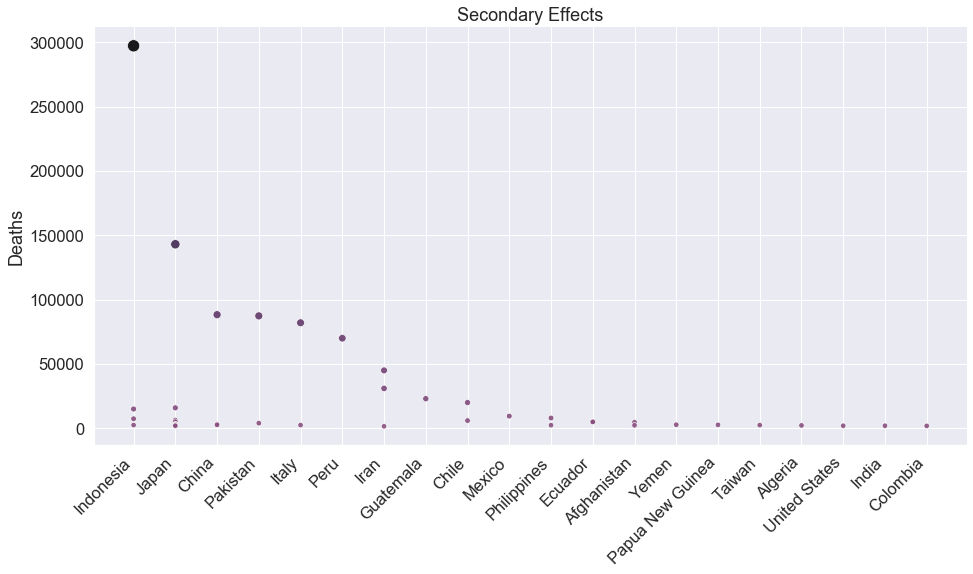

In [220]:

sns.set(font_scale=1.5,style='darkgrid',palette='deep',context='notebook')
cmap = sns.cubehelix_palette(dark=.01, light=.4, as_cmap=True)
sns.relplot(x='country',y='highest_death',size='highest_death',
                hue='highest_death',height=7,alpha=.9,aspect=2,
                sizes=(30, 150),palette=cmap,data=secondary_effect)._legend.remove()
#add a title
plt.title('Secondary Effects')
plt.xlabel('')#no need for lable in x. it speaks for itself
plt.ylabel('Deaths')
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
      
);


In [222]:
no_report=pd.read_csv('data/earth_table.csv')
#give me only rows that have NO REPORTED secondary effects
no_report=no_report[no_report['Secondary_Effects']=='no report']
#remove rows that have NaN for highest_death column
#df.dropna(subset=[1])
no_report=no_report.dropna(subset=['highest_death'])
#sort my highest death and give me the top 40
no_report=no_report.sort_values(by='highest_death',ascending=False)[:40]
no_report.head(2)

Origin_(UTC) country     Lat     Long  Depth_(km)  Magnitude  \
582  1976-07-27 19:42:00   China  39.605  117.888        16.7        7.6   
102  1920-12-16 12:05:00   China  36.601  105.317        25.0        8.6   

    Secondary_Effects  PDE_Shaking_Deaths  PDE_Total_Deaths  \
582         no report            655237.0          655237.0   
102         no report                 NaN               NaN   

     Utsu_Total_Deaths  EM-DAT_Total_Deaths  Other_Source_Deaths  \
582           242800.0             242000.0                  NaN   
102           235502.0             180000.0                  NaN   

     highest_death  year  
582       655237.0  1976  
102       235502.0  1920

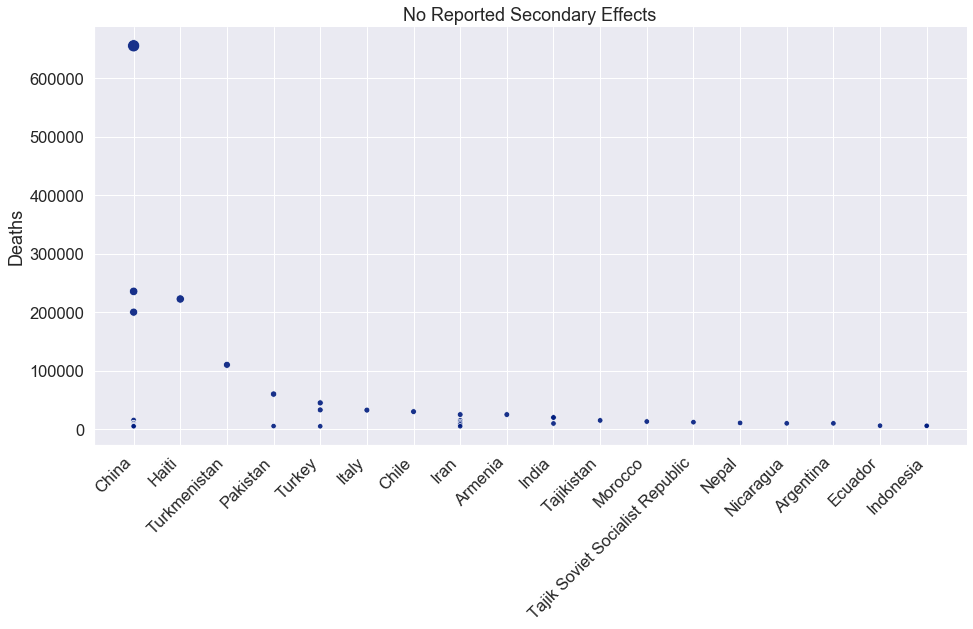

In [327]:
sns.set(font_scale=1.5,style='darkgrid',palette='dark',context='notebook')
cmap = sns.cubehelix_palette(dark=.01, light=.8, as_cmap=True)
sns.relplot(x='country',y='highest_death',size='highest_death',
                height=7,alpha=.9,aspect=2,
                sizes=(30, 150),palette=cmap,data=no_report)._legend.remove()
#add a title
plt.title('No Reported Secondary Effects')
plt.xlabel('')#no need for lable in x. it speaks for itself
plt.ylabel('Deaths')
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
      
);

### It does not look like there is much difference whether there is Secondary Effects or not^^^^

### see if there is a correlation between Magnitude and Deaths

In [226]:
mag_death=pd.read_csv('data/earth_table.csv')
#remove rows that have NaN for highest_death column
#df.dropna(subset=[1])
mag_death=mag_death.dropna(subset=['highest_death'])

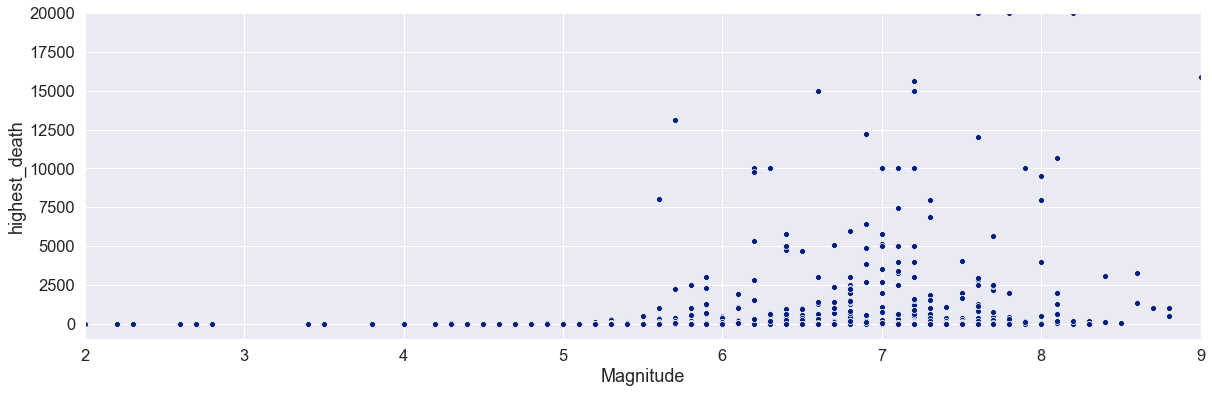

In [426]:

plt.figure(figsize=(20, 6))
#make a scatter plot magnitue vs highest death
sns.scatterplot(x='Magnitude', y='highest_death', data=mag_death)

# control x and y limits
plt.ylim(-1000, 20000)
plt.xlim(2, 9);


In [275]:
#this gives you one value whereas the one above gives you two values.correlaton 
mag_death['Magnitude'].corr(mag_death['highest_death'])

0.1397039362639968

### not much of a correlation between magnitude and death

### see how the earthquakes are spread around the world and find the countries with the most earthquakes

In [276]:
#how many unique years are being represented
earth_table.year.nunique()

113

In [279]:
#countries and their count of earthquakes
earth_table.groupby('country')[['Magnitude']].count().sort_values(by='Magnitude',ascending=False).head(2)

Magnitude
country             
China            166
Indonesia         97

In [283]:
earth_table.groupby(['year','country'])[['Magnitude']].count().sort_values(by='Magnitude',ascending=False).head(5)

Magnitude
year country             
1976 China             10
2003 China             10
1999 Turkey             8
2004 Indonesia          8
1989 China              7

In [284]:
earth_table.columns

Index(['Origin_(UTC)', 'country', 'Lat', 'Long', 'Depth_(km)', 'Magnitude',
       'Secondary_Effects', 'PDE_Shaking_Deaths', 'PDE_Total_Deaths',
       'Utsu_Total_Deaths', 'EM-DAT_Total_Deaths', 'Other_Source_Deaths',
       'highest_death', 'year'],
      dtype='object')

In [285]:
###EXPERIMENTAL WORK###
#exprot a file that will work for the basemap format. remove all the NaN values and a few columns

#read in the file 
quake_data=pd.read_csv('data/earth_table.csv')
#rename column
quake_data=quake_data.rename(columns={'Origin_(UTC)':'Origin'})
#drop lots of columns
quake_data= quake_data.drop(columns= ['Depth_(km)','year','highest_death','Other_Source_Deaths','EM-DAT_Total_Deaths','Utsu_Total_Deaths','PDE_Total_Deaths','PDE_Shaking_Deaths','Secondary_Effects'])
#drop NaN values 
#df.dropna()
quake_data=quake_data.dropna()
#convert df to a string 
#quake_data=quake_data.to_string()

#export the file that had only the 4 columns and all the NaN values removed 
no_nan=quake_data.to_csv('data/no_nan.csv',index=None)

In [286]:
import csv
maps = 'data/no_nan.csv'
# Create empty lists for the latitudes and longitudes.
lats, lons = [], []
magnitudes = []
timestrings = []
# Read through the entire file, skip the first line,
#  and pull out just the lats and lons.
with open(maps) as f:
    # Create a csv reader object.
    reader = csv.reader(f)
    # Ignore the header row.
    next(reader)
    # Store the latitudes and longitudes in the appropriate lists.
    for row in reader:
        lats.append(float(row[2]))
        lons.append(float(row[3]))
        magnitudes.append(float(row[4]))
        timestrings.append(row[0])
        


//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:19: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:22: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.


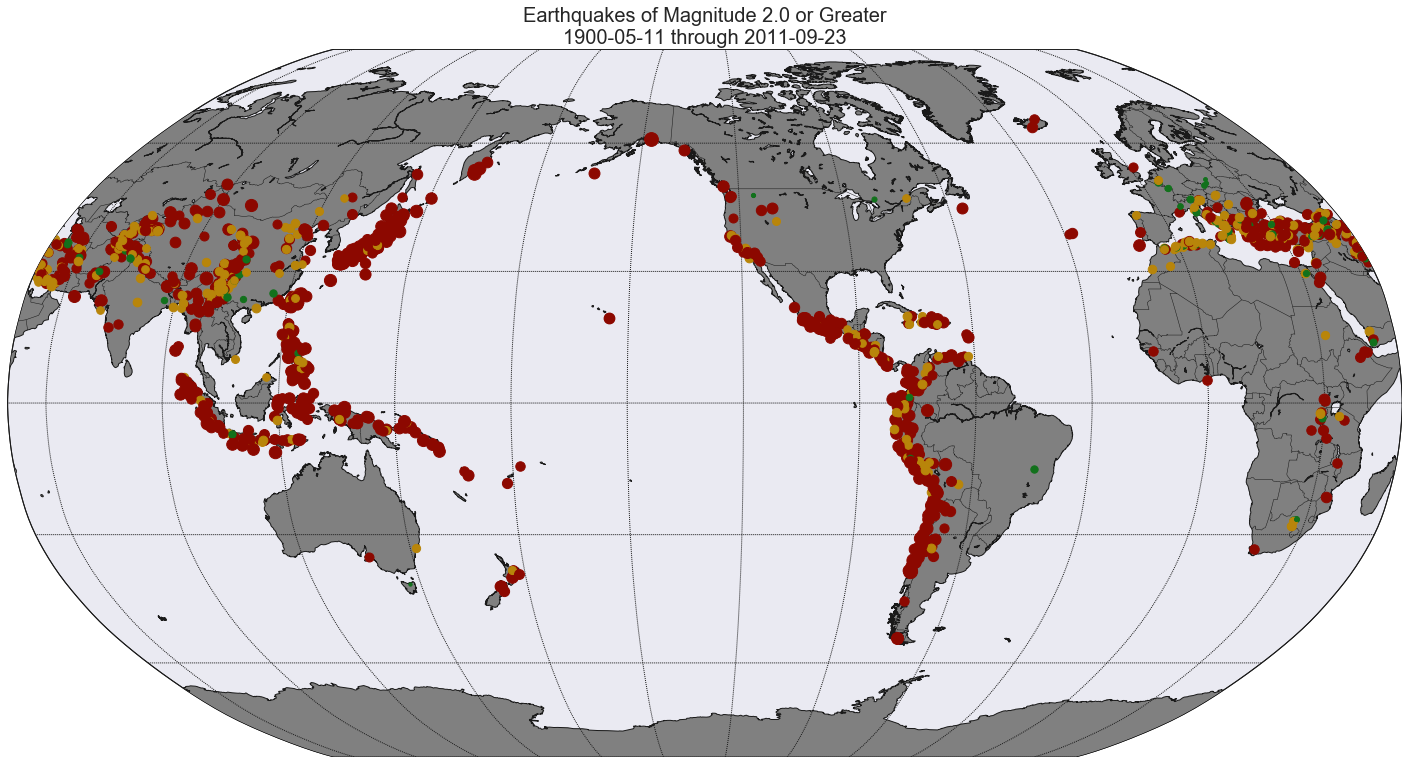

In [287]:
#BUILD THE MAP
#lets add color to the dots. green will mean less that 3magnituede, yellow if its less that 5. and red for rest
def get_color(magnitudes):
    # Returns green for small earthquakes, yellow for moderate
    #  earthquakes, and red for significant earthquakes.
    if magnitudes < 5.0:
        return ('go')
    elif magnitudes < 6.0:
        return ('yo')
    else:
        return ('ro')
    
    
# Make this plot larger.
plt.figure(figsize=(25,25))

##THE MAP##
eq_map = Basemap(projection='robin', resolution = 'l', area_thresh = 1000.0,
              lat_0=0, lon_0=-130)
eq_map.drawcoastlines()
#Let’s add country border
eq_map.drawcountries()
eq_map.fillcontinents(color = 'grey')

#Now let’s clean up the edge of the globe
eq_map.drawmapboundary()#(fill_color='aqua')
#Now let’s draw latitude and longitude lines
eq_map.drawmeridians(np.arange(0, 360, 30))
eq_map.drawparallels(np.arange(-90, 90, 30))

#set it to where the dot size is adjusted to magnitude 
min_marker_size = 1.5
for lon, lat, mag in zip(lons, lats, magnitudes):
    x,y = eq_map(lon, lat)
    msize = mag * min_marker_size
    marker_string = get_color(mag)
    eq_map.plot(x, y, marker_string, markersize=msize)
#Our title needs to include the date range for these earthquakes, which requires us to pull in a little more
#data when we parse the raw text. To make the title, we'll use the dates of the first and last earthquakes.
#Since the file includes the most recent earthquakes first, we need to use the last items as the starting date:    
title_string = "Earthquakes of Magnitude 2.0 or Greater\n"
title_string += "%s through %s" % (timestrings[0][:10], timestrings[-1][:10])
plt.title(title_string,fontsize=20);

In [288]:
#read in the clean data file 
occurence=pd.read_csv('data/earth_table.csv')

In [289]:
occurence.head()

Origin_(UTC)    country   Lat   Long  Depth_(km)  Magnitude  \
0  1900-05-11 17:23:00      Japan  38.7  141.1         5.0        7.0   
1  1900-07-12 06:25:00     Turkey  40.3   43.1         NaN        5.9   
2  1900-10-29 09:11:00  Venezuela  11.0  -66.0         0.0        7.7   
3  1901-02-15 00:00:00      China  26.0  100.1         0.0        6.5   
4  1901-03-31 07:11:00   Bulgaria  43.4   28.7         NaN        6.4   

  Secondary_Effects  PDE_Shaking_Deaths  PDE_Total_Deaths  Utsu_Total_Deaths  \
0         no report                 NaN               NaN                NaN   
1         no report                 NaN               NaN              140.0   
2         no report                 NaN               NaN                NaN   
3         no report                 NaN               NaN                NaN   
4         no report                 NaN               NaN                4.0   

   EM-DAT_Total_Deaths  Other_Source_Deaths  highest_death  year  
0                  NaN                  NaN            NaN  1900  
1                  NaN                  NaN          140.0  1900  
2                  NaN                  NaN            NaN  1900  
3                  NaN                  NaN            NaN  1901  
4                  NaN                  NaN            4.0  1901

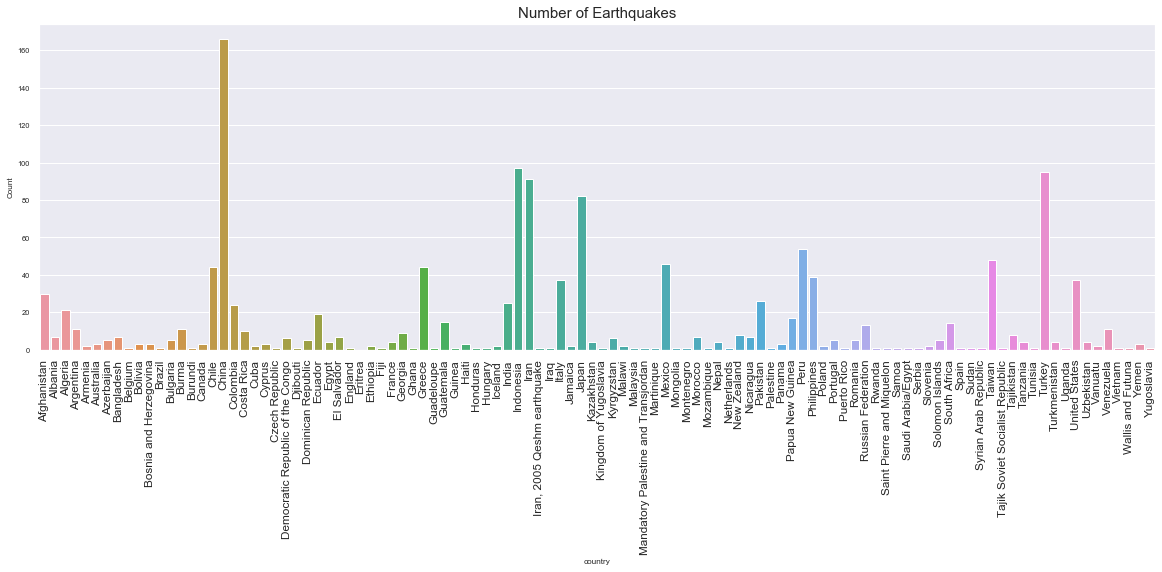

In [290]:
#all the countires and their earthquake count
country=occurence.groupby('country',as_index=None)[['Magnitude']].count()
country=country.rename(columns={'Magnitude':'Count'})
#this makes the figure bigger 
plt.figure(figsize=(20, 6))
sns.set(font_scale=.68)

sns.barplot(x="country", y="Count", data=country).set_title('Number of Earthquakes',fontsize=15)
plt.xticks(
    rotation=90, 
    horizontalalignment='center',
    fontweight='light',
    fontsize='x-large'  
);

In [291]:
#zooom in to the top 20 coutires with the most earthquakes in the century.
the_20=country.nlargest(n=20,columns='Count')


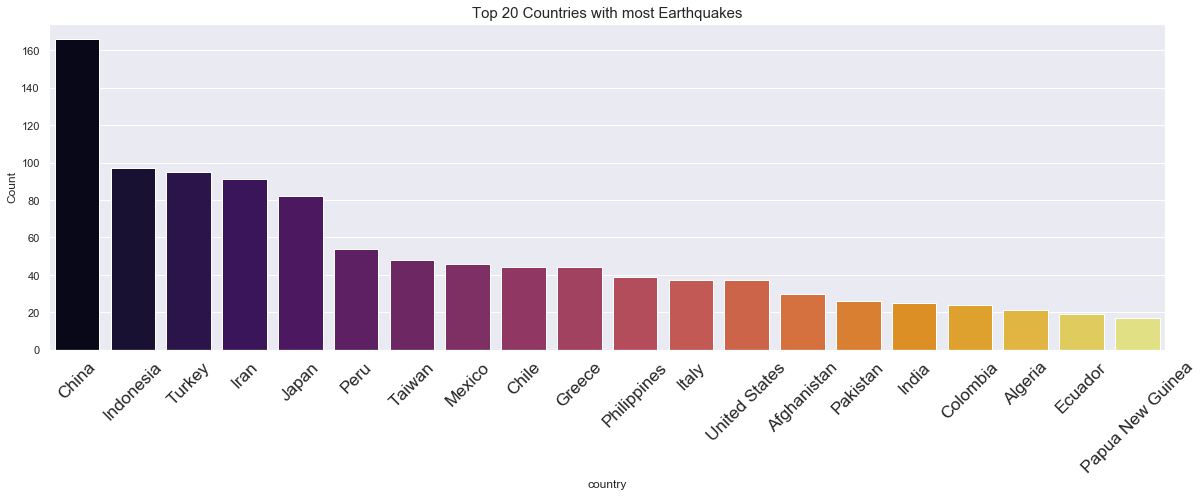

In [292]:
#plot the top 20
plt.figure(figsize=(20, 6))
sns.set(font_scale=1)

sns.barplot(x="country", y="Count", data=the_20,palette='inferno').set_title('Top 20 Countries with most Earthquakes',fontsize=15)
plt.xticks(
    rotation=45, 
    horizontalalignment='center',
    fontweight='light',
    fontsize='x-large'  
);


In [ ]:
occurence.head()

In [348]:
from ipywidgets import interact

@interact(Year = occurence.year.dropna().unique())
def show(Year):
   
    data=occurence.loc[occurence.year==Year][['country','highest_death']]
    data.plot.bar(x='country',y='highest_death',facecolor='r',edgecolor='b',figsize=[16,7]).get_legend().remove()
    #plt.figure(figsize=(6,3))
    plt.ylabel('Deaths')
    plt.xlabel('')
    plt.title('Deaths per Year')
    
    

interactive(children=(Dropdown(description='Year', options=(1900, 1901, 1902, 1903, 1904, 1905, 1906, 1907, 19…

## 

In [347]:
import plotly.express as px

gapminder=px.data.gapminder()

px.scatter(occurence,x='highest_death',y='Magnitude',animation_frame='year',
          hover_name='country',color='Magnitude',
          size_max=55,range_x=[10,500],range_y=[2,9.5])
    

### Get only the top 5 countries with the most earthquakes in the century 

In [382]:
#bring in the top 5 countries with the most earthquakes
big_5=pd.read_csv('data/earth_table.csv')
big_5.head(2)

Origin_(UTC) country   Lat   Long  Depth_(km)  Magnitude  \
0  1900-05-11 17:23:00   Japan  38.7  141.1         5.0        7.0   
1  1900-07-12 06:25:00  Turkey  40.3   43.1         NaN        5.9   

  Secondary_Effects  PDE_Shaking_Deaths  PDE_Total_Deaths  Utsu_Total_Deaths  \
0         no report                 NaN               NaN                NaN   
1         no report                 NaN               NaN              140.0   

   EM-DAT_Total_Deaths  Other_Source_Deaths  highest_death  year  
0                  NaN                  NaN            NaN  1900  
1                  NaN                  NaN          140.0  1900

In [387]:
#the .isin allows me to get dataframe that only has these 5 coutries I selected
big_5=big_5.loc[big_5['country'].isin(['China','Indonesia','Turkey','Iran','Japan'])]

In [392]:
big_5.country.value_counts()

China        166
Indonesia     97
Turkey        95
Iran          91
Japan         82
Name: country, dtype: int64

In [394]:
px.bar(big_5, x="country", y="highest_death", color='Secondary_Effects', barmode='group',
             height=400)

In [508]:
import matplotlib.ticker as ticker
import matplotlib.animation as animation

In [599]:
the_world=pd.read_csv('data/earth_table.csv')
#remove rows who highest_death has NaN values
#df = df[np.isfinite(df['EPS'])]
the_world=the_world[np.isfinite(the_world['highest_death'])]

In [600]:
the_world.Secondary_Effects.value_counts()

no report    913
L            163
T            131
T,L           26
L,Lq          10
F              9
T,F            5
Lq             4
T,L,Lq         4
T,LF           2
T,Lq           2
L,F            1
L,F,Lq         1
Name: Secondary_Effects, dtype: int64

In [601]:
the_world['Secondary_Effects']=the_world['Secondary_Effects'].replace(['L','T','T,L','L,Lq','F','T,F',
                                                               'Lq','T,L,Lq','T,LF','T,Lq','L,F',
                                                               'L,F,Lq'],'report')

the_world.Secondary_Effects.value_counts()

no report    913
report       358
Name: Secondary_Effects, dtype: int64

### experimental work

In [607]:
exp_work=the_world.sort_values(by='year')
country_run=exp_work.groupby(['year','country','Secondary_Effects'],as_index=None)[['highest_death']].sum()
country_run.sort_values(by='highest_death',ascending=False).head()

year    country Secondary_Effects  highest_death
451  1976      China         no report       655450.0
905  2004  Indonesia            report       297303.0
78   1920      China         no report       235502.0
979  2010      Haiti         no report       222517.0
106  1927      China         no report       200007.0

In [612]:
country_run[country_run['country']=='China'].sort_values(by='year')

year country Secondary_Effects  highest_death
5    1902   China         no report         5650.0
14   1904   China         no report          565.0
22   1906   China         no report          285.0
33   1909   China         no report           19.0
43   1910   China         no report            1.0
55   1913   China         no report         1314.0
62   1915   China         no report          170.0
68   1917   China         no report         1879.0
72   1918   China         no report        10000.0
78   1920   China         no report       235502.0
88   1923   China         no report         5000.0
93   1924   China         no report          255.0
98   1925   China         no report         5808.0
106  1927   China         no report       200007.0
126  1930   China         no report           42.0
132  1931   China         no report        10000.0
143  1932   China         no report          281.0
150  1933   China         no report         6865.0
156  1934   China         no report            1.0
158  1935   China         no report            2.0
164  1936   China         no report          766.0
167  1937   China         no report         3833.0
174  1939   China         no report            1.0
179  1940   China         no report          183.0
185  1941   China         no report          287.0
193  1942   China         no report           90.0
205  1944   China         no report            4.0
210  1945   China         no report          600.0
224  1947   China         no report            4.0
229  1948   China         no report         1026.0
..    ...     ...               ...            ...
562  1984   China         no report           13.0
577  1985   China         no report          100.0
587  1986   China         no report            2.0
606  1987   China         no report            3.0
624  1988   China            report          748.0
638  1989   China         no report           69.0
653  1990   China         no report          130.0
654  1990   China            report          126.0
673  1991   China         no report            1.0
695  1992   China         no report            1.0
712  1993   China         no report           10.0
751  1995   China         no report           95.0
768  1996   China         no report          375.0
778  1997   China         no report           32.0
796  1998   China         no report            3.0
797  1998   China            report           76.0
812  1999   China         no report            1.0
833  2000   China         no report           16.0
849  2001   China            report            2.0
848  2001   China         no report            6.0
859  2002   China         no report            2.0
882  2003   China         no report          295.0
883  2003   China            report           16.0
901  2004   China         no report            4.0
917  2005   China         no report           18.0
935  2006   China            report           23.0
947  2007   China            report            3.0
962  2008   China            report        88295.0
961  2008   China         no report           43.0
978  2010   China            report         2698.0

[80 rows x 4 columns]

### experimental work ^^^

In [608]:
current_year=2018
dff=the_world[the_world['year'].eq(current_year)].sort_values(by='highest_death',ascending=True).head(10)
dff

Empty DataFrame
Columns: [Origin_(UTC), country, Lat, Long, Depth_(km), Magnitude, Secondary_Effects, PDE_Shaking_Deaths, PDE_Total_Deaths, Utsu_Total_Deaths, EM-DAT_Total_Deaths, Other_Source_Deaths, highest_death, year]
Index: []

<BarContainer object of 0 artists>

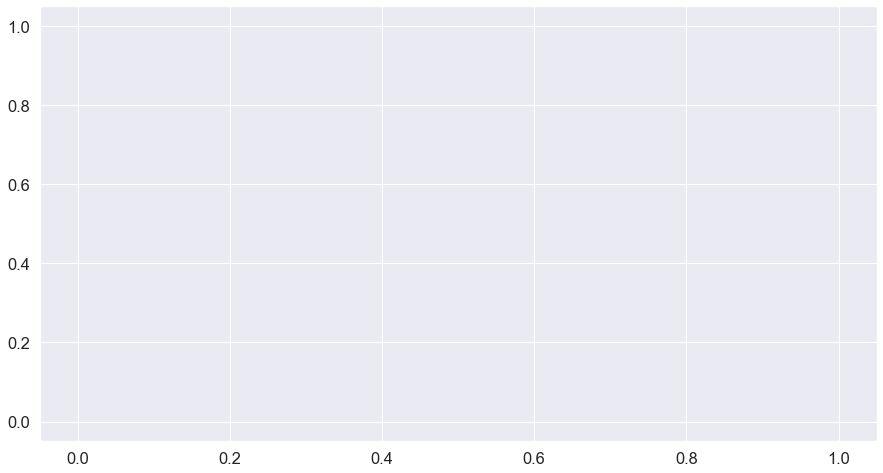

In [578]:
fig, ax = plt.subplots(figsize=(15, 8))
ax.barh(dff['country'], dff['highest_death'])

In [579]:
#We’ll user colors and group_lk to add color to the bars.
colors = dict(zip(
    ['report','no report'],
    ['#adb0ff', '#90d595']
))
group_lk = the_world.set_index('country')['Secondary_Effects'].to_dict()

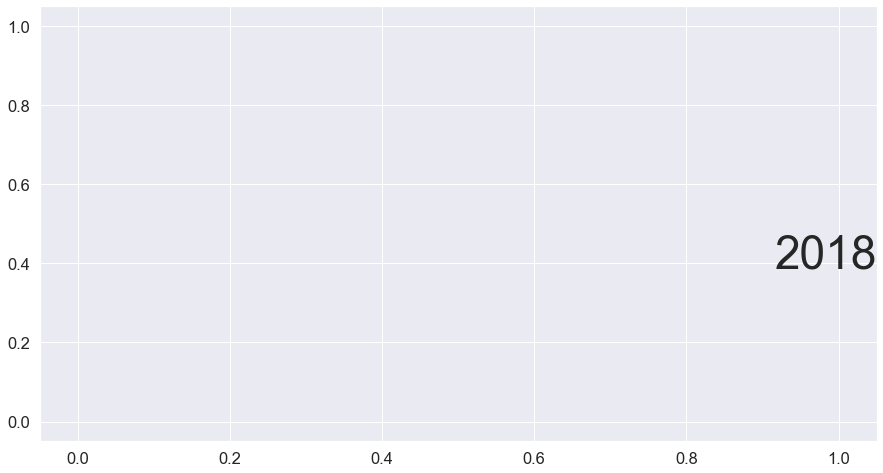

In [580]:
#group_lk is mapping between name and group values.
fig, ax = plt.subplots(figsize=(15, 8))
dff = dff[::-1]   # flip values from top to bottom
# pass colors values to `color=`
# pass colors values to `color=`
ax.barh(dff['country'], dff['highest_death'], color=[colors[group_lk[x]] for x in dff['country']])
# iterate over the values to plot labels and values (Tokyo, Asia, 38194.2)
for i, (value, name) in enumerate(zip(dff['highest_death'], dff['country'])):
    ax.text(value, i,     name,            ha='right')  # Tokyo: name
    ax.text(value, i-.25, group_lk[name],  ha='right')  # Asia: group name
    ax.text(value, i,     value,           ha='left')   # 38194.2: value
# Add year right middle portion of canvas
ax.text(1, 0.4, current_year, transform=ax.transAxes, size=46, ha='right');

In [581]:
#For convenience let’s move our code to draw_barchart function.
#We need to style following items:
#Text: Update font sizes, color, orientation
#Axis: Move X-axis to top, add color & subtitle
#Grid: Add lines behind bars
#Format: comma separated values and axes tickers
#Add title, credits, gutter space
#Remove: box frame, y-axis labels

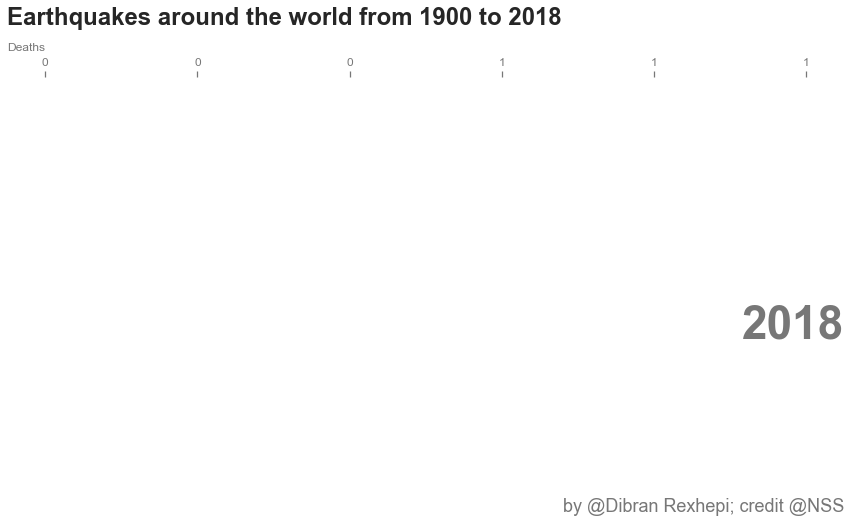

In [622]:
fig, ax = plt.subplots(figsize=(15, 8))

def draw_barchart(year):
    dff = the_world[the_world['year'].eq(year)].sort_values(by='highest_death', ascending=True).tail(10)
    ax.clear()
    ax.barh(dff['country'], dff['highest_death'], color=[colors[group_lk[x]] for x in dff['country']])
    dx = dff['highest_death'].max() / 200
    for i, (value, name) in enumerate(zip(dff['highest_death'], dff['country'])):
        ax.text(value-dx, i,     name,           size=14, weight=600, ha='right', va='bottom')
        ax.text(value-dx, i-.25, group_lk[name], size=10, color='#444444', ha='right', va='baseline')
        ax.text(value+dx, i,     f'{value:,.0f}',  size=14, ha='left',  va='center')
    # ... polished styles
    ax.text(1, 0.4, year, transform=ax.transAxes, color='#777777', size=46, ha='right', weight=800)
    ax.text(0, 1.06, 'Deaths', transform=ax.transAxes, size=12, color='#777777')
    ax.xaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
    ax.xaxis.set_ticks_position('top')
    ax.tick_params(axis='x', colors='#777777', labelsize=12)
    ax.set_yticks([])
    ax.margins(0, 0.01)
    ax.grid(which='major', axis='x', linestyle='-')
    ax.set_axisbelow(True)
    ax.text(0, 1.12, 'Earthquakes around the world from 1900 to 2018',
            transform=ax.transAxes, size=24, weight=600, ha='left')
    ax.text(1, 0, 'by @Dibran Rexhepi; credit @NSS', transform=ax.transAxes, ha='right',
            color='#777777', bbox=dict(facecolor='white', alpha=0.8, edgecolor='white'))
    plt.box(False)
    
draw_barchart(2018)

In [ ]:
fig, ax = plt.subplots(figsize=(15, 8))
animator = animation.FuncAnimation(fig, draw_barchart, frames=range(1900, 2018))
HTML(animator.to_jshtml()) 

### Question 2 ###

In [401]:
url= 'https://earthquake.usgs.gov/fdsnws/event/1/query.csv?starttime=1900-01-01%2000:00:00&endtime=2019-10-15%2023:59:59&maxlatitude=38.204&minlatitude=34.125&maxlongitude=-79.541&minlongitude=-90.879&minmagnitude=0.5&orderby=time-asc' 

In [402]:
r = requests.get(url)

In [403]:
print(r.url)

https://earthquake.usgs.gov/fdsnws/event/1/query.csv?starttime=1900-01-01%2000:00:00&endtime=2019-10-15%2023:59:59&maxlatitude=38.204&minlatitude=34.125&maxlongitude=-79.541&minlongitude=-90.879&minmagnitude=0.5&orderby=time-asc


In [404]:
r.status_code

200

In [405]:
print(r.text)

time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,net,id,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
1903-02-09T00:21:00.000Z,37.8,-89.3,,4.9,fa,,,,,ushis,ushis414,2018-06-04T20:43:44.000Z,"Illinois",earthquake,,,,,reviewed,ushis,sc
1903-11-04T18:18:00.000Z,36.5,-89.5,,4.6,fa,,,,,ushis,ushis422,2018-06-04T20:43:44.000Z,"Tennessee",earthquake,,,,,reviewed,ushis,sc
1903-11-04T19:14:00.000Z,36.5,-89.8,,5.1,fa,,,,,ushis,ushis423,2018-06-04T20:43:44.000Z,"Missouri",earthquake,,,,,reviewed,ushis,sc
1905-08-22T05:08:00.000Z,37.2,-89.3,,4.8,fa,,,,,ushis,ushis439,2018-06-04T20:43:44.000Z,"Illinois",earthquake,,,,,reviewed,ushis,sc
1909-10-23T07:10:00.000Z,37,-89.5,,4.5,fa,,,,,ushis,ushis494,2018-06-04T20:43:44.000Z,"Missouri",earthquake,,,,,reviewed,ushis,bar
1913-01-01T18:28:00.000Z,34.7,-81.7,,4.8,fa,,,,,ushis,ushis544,2018-06-04T20:43:44.000Z,"South Carolina",earthquake,,,,,reviewed,ushis,sc
1913-03-28T21:50:00.000Z,36.2,-83.7,,4.1,f

In [406]:
#First, we can read the text into a DataFrame using read_csv
#Another way to make it work is to pass the url itself to read_csv.
eq = pd.read_csv(r.url)
eq.head()

time  latitude  longitude  depth  mag magType  nst  \
0  1903-02-09T00:21:00.000Z      37.8      -89.3    NaN  4.9      fa  NaN   
1  1903-11-04T18:18:00.000Z      36.5      -89.5    NaN  4.6      fa  NaN   
2  1903-11-04T19:14:00.000Z      36.5      -89.8    NaN  5.1      fa  NaN   
3  1905-08-22T05:08:00.000Z      37.2      -89.3    NaN  4.8      fa  NaN   
4  1909-10-23T07:10:00.000Z      37.0      -89.5    NaN  4.5      fa  NaN   

   gap  dmin  rms  ...                   updated      place        type  \
0  NaN   NaN  NaN  ...  2018-06-04T20:43:44.000Z   Illinois  earthquake   
1  NaN   NaN  NaN  ...  2018-06-04T20:43:44.000Z  Tennessee  earthquake   
2  NaN   NaN  NaN  ...  2018-06-04T20:43:44.000Z   Missouri  earthquake   
3  NaN   NaN  NaN  ...  2018-06-04T20:43:44.000Z   Illinois  earthquake   
4  NaN   NaN  NaN  ...  2018-06-04T20:43:44.000Z   Missouri  earthquake   

  horizontalError depthError  magError  magNst    status  locationSource  \
0             NaN        NaN       NaN     NaN  reviewed           ushis   
1             NaN        NaN       NaN     NaN  reviewed           ushis   
2             NaN        NaN       NaN     NaN  reviewed           ushis   
3             NaN        NaN       NaN     NaN  reviewed           ushis   
4             NaN        NaN       NaN     NaN  reviewed           ushis   

  magSource  
0        sc  
1        sc  
2        sc  
3        sc  
4       bar  

[5 rows x 22 columns]

In [407]:
eq.place=eq.place.str.replace(' ','_')

In [408]:
#for t in eq.place:
def tn_state(t):
    tn_split=str(t).split('_')
    if len(tn_split)==1:
        state=t
    else:
        state=tn_split[-1]
    return state
        

In [409]:
%%time
eq.place=eq.place.apply(tn_state)

CPU times: user 11.8 ms, sys: 555 µs, total: 12.3 ms
Wall time: 12.2 ms


In [410]:
#give me just the data for TN only 
tennessee=eq[eq.place=='Tennessee']

In [411]:
tennessee.head()

time  latitude  longitude  depth  mag magType  nst  \
1   1903-11-04T18:18:00.000Z    36.500    -89.500    NaN  4.6      fa  NaN   
6   1913-03-28T21:50:00.000Z    36.200    -83.700    NaN  4.1      fa  NaN   
11  1918-10-16T02:15:00.000Z    36.000    -89.200    NaN  4.5      fa  NaN   
20  1928-11-03T04:02:50.200Z    36.112    -82.828    5.0  4.5      lg  NaN   
26  1955-03-29T09:02:40.000Z    36.000    -89.500    NaN  3.9      fa  NaN   

    gap  dmin  rms  ...                   updated      place        type  \
1   NaN   NaN  NaN  ...  2018-06-04T20:43:44.000Z  Tennessee  earthquake   
6   NaN   NaN  NaN  ...  2018-06-04T20:43:44.000Z  Tennessee  earthquake   
11  NaN   NaN  NaN  ...  2018-06-04T20:43:44.000Z  Tennessee  earthquake   
20  NaN   NaN  NaN  ...  2018-06-04T20:43:44.000Z  Tennessee  earthquake   
26  NaN   NaN  NaN  ...  2018-06-04T20:43:44.000Z  Tennessee  earthquake   

   horizontalError depthError  magError  magNst    status  locationSource  \
1              NaN        NaN       NaN     NaN  reviewed           ushis   
6              NaN        NaN       NaN     NaN  reviewed           ushis   
11             NaN        NaN       NaN     NaN  reviewed           ushis   
20             NaN        NaN       NaN     NaN  reviewed           ushis   
26             NaN        NaN       NaN     NaN  reviewed           ushis   

   magSource  
1         sc  
6         sc  
11        sg  
20        dg  
26        sc  

[5 rows x 22 columns]

In [412]:
#remove lots of random columns
tennessee= tennessee.drop(columns= ['nst','gap','dmin','rms','updated','horizontalError',
                                   'depthError','magError','magNst','status','locationSource','magSource',
                                   'net','id','magType'])

In [413]:
#converted the time section to datetime type
tennessee['time']=pd.to_datetime(tennessee['time'])
#add a column with just year
tennessee['year']=tennessee['time'].dt.year

In [414]:
tennessee.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4428 entries, 1 to 10115
Data columns (total 8 columns):
time         4428 non-null datetime64[ns, UTC]
latitude     4428 non-null float64
longitude    4428 non-null float64
depth        4424 non-null float64
mag          4428 non-null float64
place        4428 non-null object
type         4428 non-null object
year         4428 non-null int64
dtypes: datetime64[ns, UTC](1), float64(4), int64(1), object(2)
memory usage: 311.3+ KB


In [415]:
tennessee.columns

Index(['time', 'latitude', 'longitude', 'depth', 'mag', 'place', 'type',
       'year'],
      dtype='object')

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


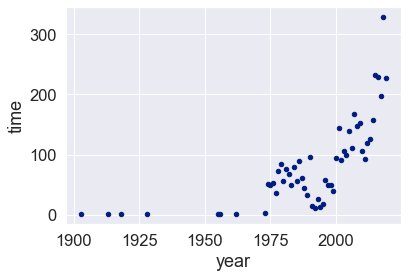

In [416]:
tennessee.groupby('year',as_index=None)[['time']].count().plot(kind='scatter',x='year',y='time');

In [417]:
tennessee.groupby('type')[['mag']].count()

mag
type              
earthquake    4427
quarry blast     1

### expert the TN data###

In [418]:
#exported my TN dataframe to use for other steps
TN_data=tennessee.to_csv('data/tn_data.csv',index=None)

In [419]:
tn_data=pd.read_csv('data/tn_data.csv')

In [420]:
# Open the TN data file.
TN_data = 'data/tn_data.csv'

# Create empty lists for the latitudes and longitudes.
tn_lat, tn_lon = [], []
tn_mag=[]

# Read through the entire file, skip the first line,
#  and pull out just the lats and lons.
with open(TN_data) as t:
    # Create a csv reader object.
    reader_tn = csv.reader(t)
    
    # Ignore the header row.
    next(reader_tn)
    
    # Store the latitudes and longitudes in the appropriate lists.
    for row in reader_tn:
        tn_lat.append(float(row[1]))
        tn_lon.append(float(row[2]))
        tn_mag.append(float(row[4]))

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:19: MatplotlibDeprecationWarning:


The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:23: MatplotlibDeprecationWarning:


The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:24: MatplotlibDeprecationWarning:


The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.



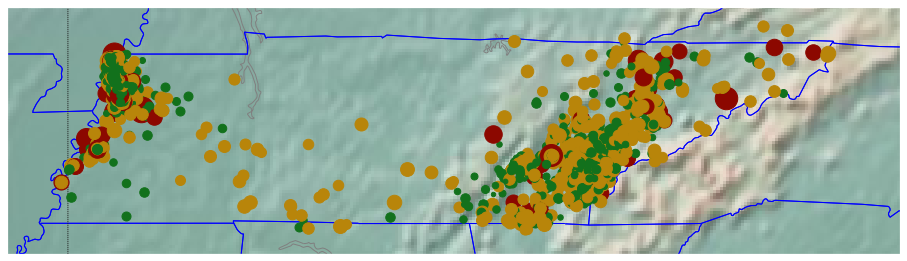

In [421]:
def color_mix(tn_mag):
    # Returns green for small earthquakes, yellow for moderate
    #  earthquakes, and red for significant earthquakes.
    if tn_mag < 2:
        return ('go')
    elif tn_mag < 3:
        return ('yo')
    else:
        return ('ro')


# Make this plot larger.
plt.figure(figsize=(16,9))

tn_map = Basemap(projection='merc',resolution='h', area_thresh=.1,
                 llcrnrlon=-90.661706,
                 llcrnrlat=34.728965,
                 urcrnrlon=-80.9296,
                 urcrnrlat=36.914326)
 
tn_map.shadedrelief()
tn_map.drawcoastlines(color='gray')
tn_map.drawcountries(color='gray')
tn_map.drawstates(color='blue',linewidth=1)    
    

tn_map.drawmeridians(np.arange(0, 360, 30))
tn_map.drawparallels(np.arange(-90, 90, 30));

tn_size = 5
for lonn, latt, magg in zip(tn_lon, tn_lat, tn_mag):
    a,b = tn_map(lonn, latt)
    msize_tn = magg * tn_size
    color_marker = color_mix(magg)
    tn_map.plot(a, b, color_marker, markersize=msize_tn)

In [449]:
import geopandas as gpd
from shapely.geometry import Point

In [450]:
tn_part=pd.read_csv('data/tn_data.csv')

In [451]:
tn_part.head(2)

time  latitude  longitude  depth  mag      place  \
0  1903-11-04 18:18:00+00:00      36.5      -89.5    NaN  4.6  Tennessee   
1  1913-03-28 21:50:00+00:00      36.2      -83.7    NaN  4.1  Tennessee   

         type  year  
0  earthquake  1903  
1  earthquake  1913

In [453]:
##create a new column called geometry..Point comes for the point package
tn_part['geometry'] = tn_part.apply(lambda row: Point(row['longitude'], row['latitude']), axis = 1)
#we want a geoDataFrame
tn_part = gpd.GeoDataFrame(tn_part, geometry = 'geometry')

In [501]:
tn_part.head()

time  latitude  longitude  depth  mag  \
0         1903-11-04 18:18:00+00:00    36.500    -89.500    NaN  4.6   
1         1913-03-28 21:50:00+00:00    36.200    -83.700    NaN  4.1   
2         1918-10-16 02:15:00+00:00    36.000    -89.200    NaN  4.5   
3  1928-11-03 04:02:50.200000+00:00    36.112    -82.828    5.0  4.5   
4         1955-03-29 09:02:40+00:00    36.000    -89.500    NaN  3.9   

       place        type  year                                      geometry  
0  Tennessee  earthquake  1903               POINT (-89.5 36.49999999999973)  
1  Tennessee  earthquake  1913                POINT (-83.7 36.1999999999997)  
2  Tennessee  earthquake  1918  POINT (-89.19999999999999 35.99999999999969)  
3  Tennessee  earthquake  1928   POINT (-82.82799999999996 36.1119999999997)  
4  Tennessee  earthquake  1955               POINT (-89.5 35.99999999999969)

In [497]:
tn_part.geometry = tn_part.geometry.to_crs({'init': 'epsg:4326'})

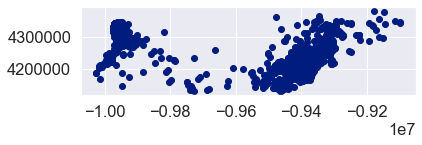

In [490]:
#plot them out long(x)...lat(y)
tn_part.plot();

In [462]:
council_districts = gpd.read_file('data/TN_counties/TN_counties.shp')

In [492]:
council_districts.head()

OBJECTID STATEFP COUNTYFP  COUNTYNS  GEOID      NAME         NAMELSAD LSAD  \
0         1      47      065  01639749  47065  Hamilton  Hamilton County   06   
1         2      47      115  01639770  47115    Marion    Marion County   06   
2         3      47      185  01639800  47185     White     White County   06   
3         4      47      129  01639778  47129    Morgan    Morgan County   06   
4         5      47      013  01639728  47013  Campbell  Campbell County   06   

  CLASSFP  MTFCC  ...     INTPTLAT      INTPTLON Region District   Grand  \
0      H1  G4020  ...  +35.1607616  -085.1977114      3       32    East   
1      H1  G4020  ...  +35.1334215  -085.6183990      3       32    East   
2      H1  G4020  ...  +35.9270486  -085.4557854      3       31  Middle   
3      H1  G4020  ...  +36.1386970  -084.6392616      3       31    East   
4      H1  G4020  ...  +36.4015922  -084.1592495      4       41    East   

   Commission FarmBureau    Shape__Are     Shape__Len  \
0           4          3  1.605505e+10  650912.052240   
1           4          3  1.428144e+10  528655.888705   
2           3          4  1.057666e+10  603207.582494   
3           2          4  1.456528e+10  623544.645736   
4           2          5  1.388656e+10  668417.596960   

                                            geometry  
0  POLYGON ((2179701.70281677 339138.160367608, 2...  
1  POLYGON ((2104604.47899577 353055.478333443, 2...  
2  (POLYGON ((2183734.86108902 529005.524726599, ...  
3  POLYGON ((2325845.12542436 630190.611069933, 2...  
4  POLYGON ((2462310.6313642 753927.887873098, 24...  

[5 rows x 26 columns]

In [498]:
council_districts.geometry=council_districts.geometry.to_crs({'init': 'epsg:4326'})

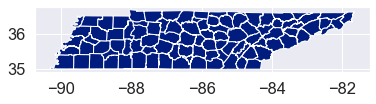

In [499]:
#this is a map of counties 
council_districts.plot();

In [ ]:
Accent, Accent_r, Blues, Blues_r, BrBG, BrBG_r, BuGn, BuGn_r, BuPu, BuPu_r, CMRmap, CMRmap_r, Dark2, Dark2_r, GnBu, GnBu_r, Greens, Greens_r, Greys, Greys_r, OrRd, OrRd_r, Oranges, Oranges_r, PRGn, PRGn_r, Paired, Paired_r, Pastel1, Pastel1_r, Pastel2, Pastel2_r, PiYG, PiYG_r, PuBu, PuBuGn, PuBuGn_r, PuBu_r, PuOr, PuOr_r, PuRd, PuRd_r, Purples,
Purples_r, RdBu, RdBu_r, RdGy, RdGy_r, RdPu, RdPu_r, RdYlBu, RdYlBu_r, RdYlGn, RdYlGn_r, Reds, Reds_r, 
Set1, Set1_r, Set2, Set2_r, Set3, Set3_r, Spectral, Spectral_r, Wistia, Wistia_r, YlGn, YlGnBu, YlGnBu_r, YlGn_r, YlOrBr, YlOrBr_r, YlOrRd, YlOrRd_r, afmhot, afmhot_r, autumn, autumn_r, binary, binary_r, bone, bone_r, brg, brg_r, bwr, bwr_r, cividis, cividis_r, cool, cool_r, coolwarm, coolwarm_r, copper, copper_r, cubehelix, cubehelix_r, flag, flag_r, gist_earth, gist_earth_r, gist_gray,
gist_gray_r, gist_heat, gist_heat_r, gist_ncar, gist_ncar_r, gist_rainbow, 
gist_rainbow_r, gist_stern, gist_stern_r, gist_yarg, gist_yarg_r, gnuplot, gnuplot2, gnuplot2_r, gnuplot_r, gray, gray_r, hot, hot_r, hsv, hsv_r, icefire, icefire_r, inferno, inferno_r, jet, jet_r, magma, magma_r, mako, mako_r, nipy_spectral, nipy_spectral_r,
ocean, ocean_r, pink, pink_r, plasma, plasma_r, prism, prism_r, rainbow, rainbow_r, rocket, rocket_r, seismic, seismic_r, spring, spring_r, summer, summer_r, tab10, tab10_r, tab20, tab20_r, tab20b, tab20b_r, tab20c, tab20c_r, terrain, terrain_r, twilight, twilight_r, twilight_shifted, twilight_shifted_r, viridis, viridis_r, vlag, vlag_r, winter, winter_r

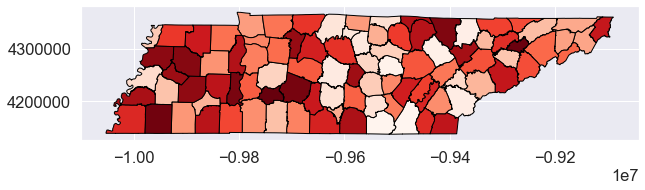

In [495]:
#this colors ie. column=council_di...you tell the color according to this column...
fig, ax = plt.subplots(figsize = (10,10))
council_districts.plot(ax = ax, legend = True, cmap = 'Reds', edgecolor = 'black');

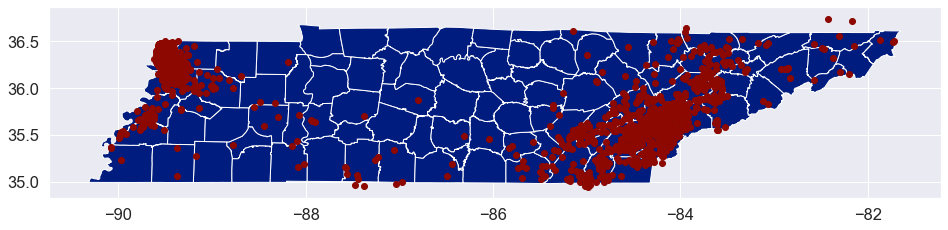

In [621]:
#plot both in the same cell. it will show the crashes on the map

#this code says plot both on same map
fig, ax = plt.subplots(figsize = (16,19))


council_districts.plot(ax = ax)
tn_part.plot(ax = ax, color = 'r');